## Group F - Energy Conversion: Calibration Interpolation

## (In collaboration with Group G - Energy Conversion: Integration)

### Summary of last update

> 1. We were given a calibration coefficient ($Cal_{R5IM}$), which can be multiplied with the voltage to find the number of protons.
> 2. Using this, we displayed the number of protons in the intensity monitor in one cycle of the synchrotron through a graph.
> 3. We researched four main methods of interpolation:
>     - **Linear** - Creates straight lines between data points
>     - **Cubic Spline** - Creates a cubic function between each adjacent data point
>     - **Lagrange Polynomial** - Creates one polynomial which passes through all data points
>     - **Newton Polynomial** - Uses a mathematical function to divide the difference between the data points by the difference between the point and the origin iteratively.
> 4. Finally, Toby tested the speed of interpolation methods.

### The Accuracy Test

> To test the accuracy of these interpolation methods, we compared them against the three trigonometric waves:
> <ul>
> <li>Henrique tested the interpolation methods against the tangent wave.</li>
> <li>Toby tested the interpolation methods against the sine wave.</li>
> <li>Heidi tested the interpolation methods against the cosine wave.</li>
> </ul>
> Soon, after a LOT of mentally-draining work, we were told to move on to the next task and we had successfully wasted our time.

### Maximum MeV Modifier

> After *that* time-waste, progress had to be done.
> </br>And soon, the final task was complete:

In [13]:
#importing necessary libraries
import glob
import pandas as pd
import random
import paho.mqtt.client as mqtt
import string
import time
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.interpolate import lagrange

In [14]:
x = np.array([70, 172, 374, 617, 780]) #5 new variables to process the two overlapping graphs
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
f = lagrange(x, y)
x_new = np.arange(70, 780, 0.1)
y_new = f(x_new)

In [ ]:
inpt1 = int(input("Enter a number above 70: "))
inpt_x_array = [70, 780] #initiated for the input above 
y_array = [2.22E-13, 3.50E-11]
inpt_x_array.append(inpt1) #creates maximum value

def divided_diff(inpt_x_array, y_array): #function to calculate the divided differences table
    n = len(y_array)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, mstime, inpt_x_array): #evaluate the newton polynomial at x
    n = len(mstime) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (inpt_x_array -mstime[n-k])*p
    return p

# get the divided difference coef
x_new_inpt = np.arange(70, inpt1, 0.1)
y_new_inpt = f(x_new_inpt)

plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new, 'g', label='Predicted Calibration Curve')
plt.plot(x_new_inpt, y_new_inpt, 'b', label='Calibration Curve')
plt.plot(x, y, 'ro')
plt.legend()
plt.grid()
plt.title('Modified Calibration Coefficient Graph')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')

### The Collaboration

> After finally finishing all of the solo group tasks, we were now instructed to collaborate with Group G to successfully:
> <ul>
> <li>Interpolate the calibration curve using methods you have defined</li>
> <li>Integrate BLM signal per bin (2200 - 1 = 2199 bins) using methods from Group G.</li>
> <li>Use Esher's BLM calibration story notebook to convert BLM signals from volts to; Protons, Coulombs (Charge), and Joules (Energy)</li>
> </ul>
> </br>
> Instinctually, we began reading Esher's BLM Calibration story.

$$ N[t]=K_I⋅I[t] $$
</br>
$$\frac{dN[t]}{dt}=K_{BL}[t]⋅BL_s[t]$$
</br>
$$ΔN=∫_{t_1}^{t_2}\frac{dN[t]}{dt}⋅dt≈\sum_{t_i=t_1}^{t_2} K_{BL} [t_i]⋅BL_s [t_i] ⋅t_s$$
</br>
$$ΔN=∫_{t_1}^{t_2}\frac{dN[t]}{dt}⋅dt=K_I⋅∫_{t_1}^{t_2}\frac{dI[t]}{dt}⋅dt=K_I (I[t_2 ]-I[t_1 ]) $$

$$ΔN=∫_{t_1}^{t_2}\frac{dN[t]}{dt}⋅dt≈K_I⋅∑_{t_i=t_1}^{t_2}\biggr(\frac{I[t_i]-I[t_{i-1} ]}{t_s}\biggr) ⋅t_s≈K_I (I[t_2]-I[t_1])$$
</br>
$$\frac{dN[t]}{dt}=K_{BL}[t]⋅BL_s[t]$$
</br>
$$ΔN=∫_{t_1}^{t_2}\frac{dN[t]}{dt}⋅dt≈\sum_{t_i=t_1}^{t_2} K_{BL} [t_i]⋅BL_s [t_i] ⋅t_s$$

> As you can see, however, it was a lot of complicated math that we didn't understand, so we ignored the notebook.
> </br>After shifting our focus away from *that*, Group G had explained to us that our plotted graph was messing all the data up, as it had a curve in the beginning that went into negative number territory.
> </br>At first, we thought to merge interpolation methods to obtain non-negative points.
> </br>However, while that would solve the negative number problem, it would make the data *slightly* less accurate.

In [10]:
x_new = np.arange(172, 780, 0.1)
y_new = f(x_new)
novaX = np.array([70, 172]) #Two new variables to create the linear interpolation of the first 2 data points
novaY = np.array([2.22E-13, 2.59E-13])

In [11]:
def divided_diff(x, y): #function to calculate the divided differences table
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, mstime, x): #evaluate the newton polynomial at x
    n = len(mstime) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -mstime[n-k])*p
    return p

Text(0, 0.5, 'Calibration Coefficient [mVs/proton]')

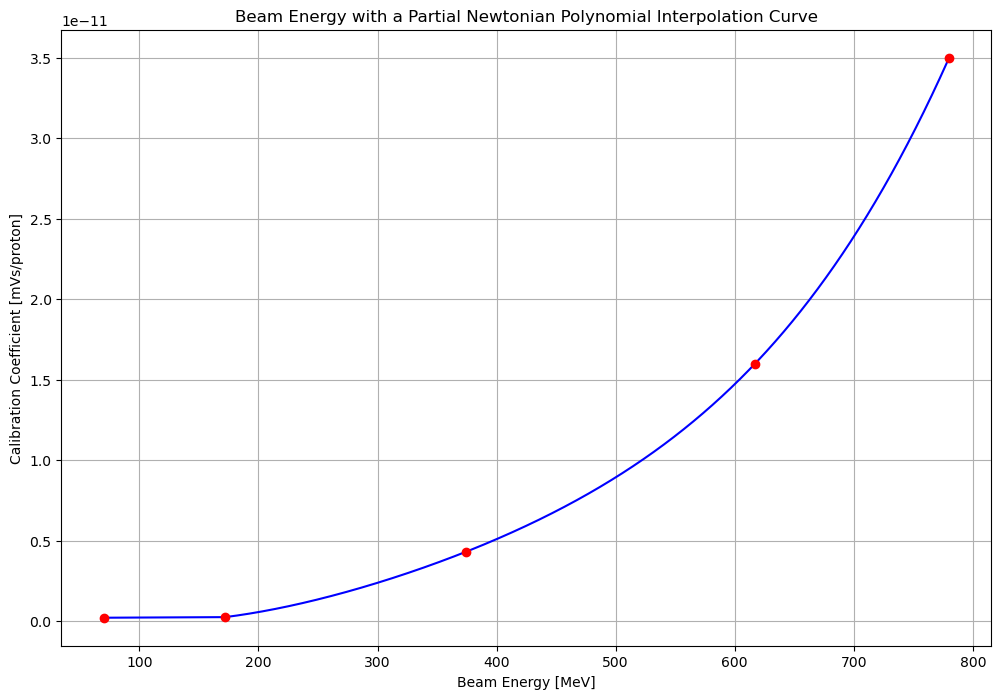

In [12]:
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

data_points = 2330
x_data = np.linspace(-55, 800, data_points)
plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new, 'b') #plots newtonian interpolation between all data points EXCEPT the first one
plt.plot(novaX, novaY, 'b') #plots linear interpolation between the 2 beginning data points
plt.plot(x, y, 'ro') #plots the red data points
plt.grid()
plt.title('Beam Energy with a Partial Newtonian Polynomial Interpolation Curve')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')

> As you can see above, the first two points are linked through linear interpolation (which is, ironically, the method of interpolation we completely ignored last update) and the other points are then interpolated using Newtonian interpolation.

> This solves the negative number problem, but (since it uses linear interpolation) it reduced accuracy between 70 and 172 MeV.

### Current Tasks
1. Find an accurate method to interpolate data to avoid negative numbers.
2. To develop a method of changing the top beam energy

### Future Tasks
1. Move on to Stage 2, and work on fully-functioning GUIs.